In [2]:
import numpy as np
import matplotlib.pyplot as pl

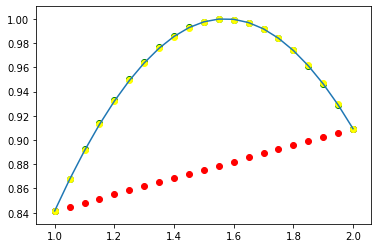

In [170]:
#TASK A

def Lagrangian(j, xp, xn):
    Lj = 1
    for k in range(len(xn)):
        if k != j:
            Lj = Lj * (xp - xn[k]) / (xn[j] - xn[k])
        else:
            pass
    return Lj

def LagrInterp(xn, yn, x):
    y = []
    for i in range(len(x)):
        a = 0
        xp = x[i]
        for j in range(len(yn)):
            a += yn[j] * Lagrangian(j,xp, xn)
        y.append(a)
    return y

#Plotting the reference function sin(x)
xsin = np.arange(1, 2.05, 0.05)
ysin = []

for x in xsin:
    ysin.append(np.sin(x))
    
pl.plot(xsin,ysin)

#Testing the interpolation method

#Linearly
xn1 = np.linspace(1, 2, 2)
yn1 = np.sin(xn1)

y1 = LagrInterp(xn1,yn1,xsin)

pl.scatter(xsin, y1, c = 'red')

#Quadratically
xn2 = np.linspace(1, 2, 3)
yn2 = np.sin(xn2)

y2 = LagrInterp(xn2,yn2,xsin)

pl.scatter(xsin, y2, c = 'green')

#Cubically
xn3 = np.linspace(1, 2, 4)
yn3 = np.sin(xn3)

y3 = LagrInterp(xn3,yn3,xsin)

pl.scatter(xsin, y3, c = 'yellow')


[0.8414709848078965, 0.8801860687712153, 0.9998487140669594, 0.9997701382334866, 0.9999995139125409, 0.9999998569281551, 0.9999999994882804, 0.9999999999972797, 0.9999999999997494, 1.0000000000000315, 1.0, 1.0, 1.0000000000000004, 1.0000000000000004]


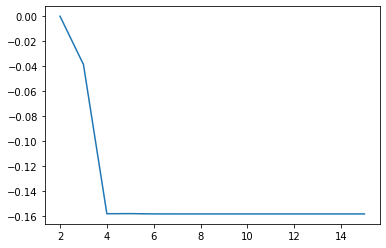

In [171]:
#TASK A PART 4 - ERROR ANALYSIS

Error = []
yps = []
xp = np.pi/2

for i in range(14):
    xn = np.linspace(1,2,i+1)
    yn = np.sin(xn)
    yp = 0
    for j in range(len(yn)):
        yp += yn[j] * Lagrangian(j,xp, xn)
    yps.append(yp)
    
print(yps)

#Calculating the error
for i in range(len(yps)):
    a = np.sin(yp) - yps[i]
    Error.append(a)
    
xError = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
pl.plot(xError, Error)



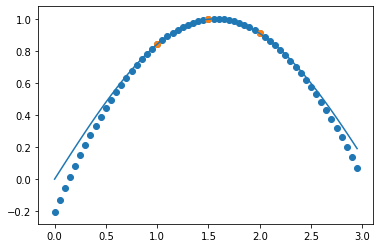

In [172]:
#TASK B 

#Defining the function that will come up with a_i from the experession. (This will take it to the base case every time, but by giving it different inputs it we will be able to come to "different levels")

def newtonDevidedDifference(xn, yn):
    if len(xn) == 1:
        return yn[0]
    else:
        return (newtonDevidedDifference(xn[1:],yn[1:]) - newtonDevidedDifference(xn[0:-1],yn[0:-1])) / (xn[-1]-xn[0])
    
#Defining the function that will do the actual interpolation for us
    
def newtonInterpolation(xn, yn, x):
    
    y = [] #making the target array for the interpolation values
    
    for k in range(len(x)):
        y_ = 0
        for i in range(len(xn)):
            y__ = newtonDevidedDifference(xn[0:i+1],yn[0:i+1])
            for j in range(i):
                y__ = y__ * (x[k] - xn[j])
            y_ += y__
        y.append(y_)
    return y
        
#Defining the nodes from which we interpolate:
    
xn = np.linspace(1,2,3) #Try for different number of nodes :D 
yn = []

for x in xn:
    yn.append(np.sin(x))
    
#Defining the nodes where we want to come up with a value, and interpolating:

x = np.arange(0,3,0.05)
    
y = newtonInterpolation(xn,yn,x)

#Plotting the result and points we started from:

pl.scatter(x,y)
pl.scatter(xn,yn)

#Plotting a reference to compare to:

a = np.arange(0,3, 0.05)
b = []

for a_ in a:
    b.append(np.sin(a_))
    
pl.plot(a,b)
        

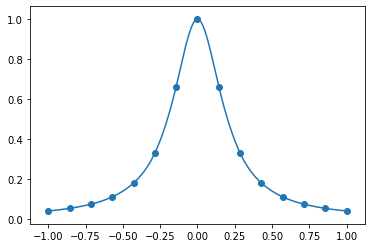

In [4]:
#TASK C

def PrintMatrix (M):
    for row in M:
            print(row)
    print('_'*40)


#To solve the set of linear equations for the calculation of the spline, we will need the Gaussian elimination fuction, that we made in Session 2

def GaussianElimination(A,b):
    
    #The number of equations in the system is
    n = len(A)

    #Eliminating the matrix so that it becomes upper triangular form
    for j in range(0,n):
        for i in range(j+1, n):
            #Save p so you can use it even after you changed A (p is the pivot)
            p = (A[i,j] / A[j,j])
            A[i] = A[i] - p * A[j]
            #Adjusting vector b as well
            b[i] = b[i] - p * b[j]
    
    #Finding the values of x_i for each case 
    
    x = np.zeros(n)
    for i in range(n-1,-1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i+1,n):
                x[i] = x[i] - x[j] * A[i][j] / A[i][i]
    return x



#Next we can write the fuction that will make the spline with the clapmped conditions and interpolate for a given set of nodes

def splines(xn,yn, boundaryConditionLower, boundaryConditionUpper, x):
    
    #Create the arrays into which the coefficients will go:
    
    aj = np.ndarray(len(xn)-1)
    bj = np.ndarray(len(xn)-1)
    cj = np.ndarray(len(xn)-1)
    dj = np.ndarray(len(xn)-1)
    
    #Create the matrix A and Collumn vector b that will help find the first derivatives v_j-s

    A = np.zeros((len(xn),len(xn)))
    b = np.zeros(len(xn))
    
    #Inputing the information we know into these matricies:
    b[0] = boundaryConditionLower
    b[-1] = boundaryConditionUpper
    
    A[0,0]   = 1
    A[-1,-1] = 1
    
    #Filling up the rest of the matrix and collumn vector:
    
    for i in range(1,len(xn)-1):
        A[i,i-1] = 1 / (xn[i]-xn[i-1])
        A[i,i] = 2 / (xn[i]-xn[i-1]) + 2 / (xn[i+1]-xn[i])
        A[i,i+1] = 1 / (xn[i+1]-xn[i])

        b[i] = 3 * ((yn[i]-yn[i-1]) / (xn[i]-xn[i-1])**2 + (yn[i+1]-yn[i]) / (xn[i+1]-xn[i])**2 )


    
    #Solving the resulting system of linear equations:
    
    v = GaussianElimination(A,b)
    
    #Determining the coefficients using all this:
    
    for i in range(len(xn)-1):
        aj[i] = yn[i]
        bj[i] =  v[i]
        cj[i] = 3*(yn[i+1]-yn[i])/(xn[i+1]-xn[i])**2 - (v[i+1]+2*v[i])/(xn[i+1]-xn[i])
        dj[i] = -2 * (yn[i+1] - yn[i]) / (xn[i+1] - xn[i]) ** 3 + (v[i+1] + v[i]) / (xn[i+1] - xn[i]) ** 2
        
    
    #Interpolate with these:
    
    y = np.zeros(len(x))
    
    for j in range(len(xn)-1):
        y[(xn[j]<=x) & (x<=xn[j+1])] = aj[j] + bj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j]) +  \
              cj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j])**2 + dj[j]*(x[(xn[j]<=x) & (x<=xn[j+1])]-xn[j])**3
        
    return y
        
    
#Creating the function to test it on:

xn = np.linspace(-1,1,15)
yn = []

for x in xn:
    yn.append(1/(1 + 25 * x ** 2))
    
#Setting the boundary conditions:

Lower = 0.074
Upper = -0.074


#Setting the nodes on which we want to show the splines:

x = np.arange(-1,1, 0.00005)

#Making the spline:

y = splines(xn,yn, Lower, Upper, x)

pl.plot(x,y)
pl.scatter(xn,yn)

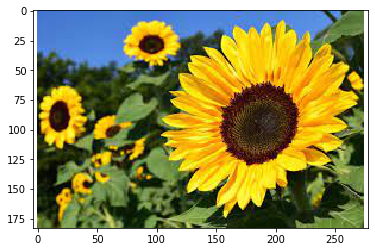

[[[ 65 115 204]
  [ 65 115 204]
  [ 65 115 204]
  ...
  [ 89 121  56]
  [ 89 121  56]
  [ 89 121  56]]

 [[ 65 115 204]
  [ 65 115 204]
  [ 66 116 205]
  ...
  [ 92 124  59]
  [ 92 124  59]
  [ 92 124  59]]

 [[ 66 116 205]
  [ 66 116 205]
  [ 66 116 205]
  ...
  [ 94 126  61]
  [ 94 126  61]
  [ 94 126  61]]

 ...

 [[ 99 116  38]
  [101 119  45]
  [ 97 117  46]
  ...
  [ 96 121  56]
  [ 75 100  35]
  [ 56  81  16]]

 [[ 94 111  40]
  [103 120  50]
  [101 122  55]
  ...
  [ 94 118  56]
  [ 71  95  33]
  [ 51  75  13]]

 [[ 89 109  40]
  [102 121  55]
  [103 123  60]
  ...
  [ 93 117  59]
  [ 71  95  37]
  [ 50  74  16]]]


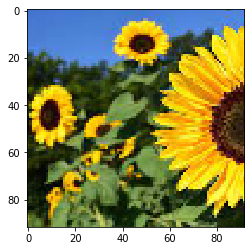

/Users/atihaas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/atihaas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/atihaas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


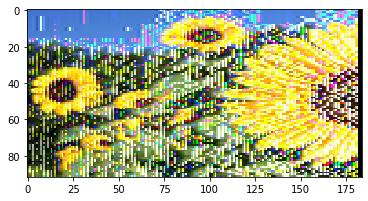

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


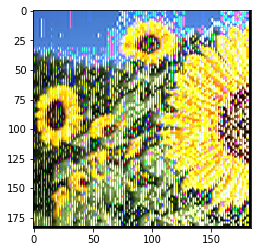

In [175]:
#TASK D 

pl.axis('equal')

#Reading in the image:

flowerPicture = pl.imread("flower.jpg")

#Displaying an image:

pl.imshow(flowerPicture)
pl.show()

print(flowerPicture) #Remember that the JPG file is just 3 layers of a matrix, each layer represents the RGB conde for the pixel it represents

#Saving an image (3 layered matrix) to a file:

pl.imsave("Test.jpg",flowerPicture)

#SHRINGKING THE IMAGE N TIMES SMALLER:

n = 2 #Defining n

smallFlowerPicture = np.zeros((int(flowerPicture.shape[1] / n),int(flowerPicture.shape[0] / n),3)) #Making the new target 3 layered array

smallFlowerPicture = flowerPicture[0: flowerPicture.shape[1] : n, 0:flowerPicture.shape[0] : n, :] #Entering only every n-th pixel into the new small image

pl.imshow(smallFlowerPicture) #Showing the new image
pl.show()

#pl.imsave("smallFlowerPicture.jpg", smallFlowerPicture) #Saving the smaller image into a new file



#RESIZEING AN IMAGE WITH INTERPOLATION


#First in the x direction

xn = np.ndarray(smallFlowerPicture.shape[1]) #Defining the points we know, xn 
for i in range(smallFlowerPicture.shape[1]):
    xn[i] = i

N = 2 #Defining the size increase

x = np.linspace(0, smallFlowerPicture.shape[1], smallFlowerPicture.shape[1] * N) #Defining the x range where we want interpolated values
largeFlowerImage1 = np.ndarray((smallFlowerPicture.shape[0], smallFlowerPicture.shape[1] * N, 3)) #Defining the matrix for the new image (only re-sized in teh x direction)

#Finding the values for the missing points

for i in range(3): #There are three layers for RGB
    for j in range(smallFlowerPicture.shape[1]): #Going over each part of the matrix row by row
        yn = smallFlowerPicture[j,:,i]
        y = splines(xn,yn,0,0,x)
        largeFlowerImage1[j,:,i] = y

pl.imshow(largeFlowerImage1.astype(int))
pl.show()


#Next, in the y direction:


xn = np.ndarray(smallFlowerPicture.shape[0]) #Defining the points we know, xn 
for i in range(smallFlowerPicture.shape[0]):
    xn[i] = i



x = np.linspace(0, smallFlowerPicture.shape[0], smallFlowerPicture.shape[0] * N) #Defining the x range where we want interpolated values
largeFlowerImage2 = np.ndarray((smallFlowerPicture.shape[0] * N, smallFlowerPicture.shape[1] * N, 3)) #Defining the matrix for the new image (only re-sized in teh x direction)

#Finding the values for the missing points

for i in range(3): #There are three layers for RGB
    for j in range(smallFlowerPicture.shape[1] * N): #Going over each part of the matrix row by row
        yn = largeFlowerImage1[:,j,i]
        y = splines(xn,yn,0,0,x)
        largeFlowerImage2[:,j,i] = y
        
        
largeFlowerImage2 = np.trunc(largeFlowerImage2)
pl.imshow(largeFlowerImage2.astype(int))
pl.show()





